In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras import metrics
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import Flatten

from nltk import word_tokenize, pos_tag, chunk
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from pprint import pprint
import pandas as pd
import numpy as np

from keras import optimizers
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.constraints import maxnorm
from keras.layers import Dropout
import os

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
path = '/Users/leonidas/Documents/GitHub/Deep-Learning-Project/Results/'
filename = '25_cleaned_job_descriptions.csv'
data = pd.read_csv(os.path.join(path, filename), header = 0, names = ['Query', 'Description'])

In [4]:
train, test = train_test_split(data, test_size = 0.2)

train_descs = train['Description']
train_labels = train['Query']
#train_labels = train['Job Title']
 
test_descs = test['Description']
test_labels = test['Query']

In [80]:
num_labels = len(train_labels.unique().tolist())
vocab_size = 1000
batch_size = 32
nb_epoch = 50

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_descs)
x_train = tokenizer.texts_to_matrix(train_descs, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_descs, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

In [81]:

model = Sequential()
model.add(Dense(4096, input_shape=(vocab_size,), activation = 'relu', kernel_initializer = 'glorot_normal', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1024, kernel_initializer = 'glorot_normal', activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
    
    # Compile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = [metrics.categorical_accuracy, 'accuracy'])

In [82]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 27s 4ms/step - loss: 2.4616 - categorical_accuracy: 0.3196 - acc: 0.3196 - val_loss: 1.7894 - val_categorical_accuracy: 0.5138 - val_acc: 0.5138
Epoch 2/50
7200/7200 [==============================] - 25s 3ms/step - loss: 1.4452 - categorical_accuracy: 0.6004 - acc: 0.6004 - val_loss: 1.4264 - val_categorical_accuracy: 0.5725 - val_acc: 0.5725
Epoch 3/50
7200/7200 [==============================] - 25s 3ms/step - loss: 1.0272 - categorical_accuracy: 0.7129 - acc: 0.7129 - val_loss: 1.2851 - val_categorical_accuracy: 0.6025 - val_acc: 0.6025
Epoch 4/50
7200/7200 [==============================] - 26s 4ms/step - loss: 0.7762 - categorical_accuracy: 0.7843 - acc: 0.7843 - val_loss: 1.2109 - val_categorical_accuracy: 0.6175 - val_acc: 0.6175
Epoch 5/50
7200/7200 [==============================] - 26s 4ms/step - loss: 0.6085 - categorical_accuracy: 0.8346 - acc: 0.8346 - val_loss: 1.1572 -

7200/7200 [==============================] - 23s 3ms/step - loss: 0.0480 - categorical_accuracy: 0.9896 - acc: 0.9896 - val_loss: 1.4709 - val_categorical_accuracy: 0.6388 - val_acc: 0.6388
Epoch 42/50
7200/7200 [==============================] - 19s 3ms/step - loss: 0.0472 - categorical_accuracy: 0.9897 - acc: 0.9897 - val_loss: 1.4517 - val_categorical_accuracy: 0.6525 - val_acc: 0.6525
Epoch 43/50
7200/7200 [==============================] - 20s 3ms/step - loss: 0.0485 - categorical_accuracy: 0.9886 - acc: 0.9886 - val_loss: 1.4554 - val_categorical_accuracy: 0.6562 - val_acc: 0.6562
Epoch 44/50
7200/7200 [==============================] - 20s 3ms/step - loss: 0.0453 - categorical_accuracy: 0.9894 - acc: 0.9894 - val_loss: 1.4550 - val_categorical_accuracy: 0.6637 - val_acc: 0.6637
Epoch 45/50
7200/7200 [==============================] - 18s 3ms/step - loss: 0.0446 - categorical_accuracy: 0.9903 - acc: 0.9903 - val_loss: 1.4519 - val_categorical_accuracy: 0.6525 - val_acc: 0.6525
Ep

In [83]:
print(history.history.keys())

dict_keys(['val_loss', 'val_categorical_accuracy', 'val_acc', 'loss', 'categorical_accuracy', 'acc'])


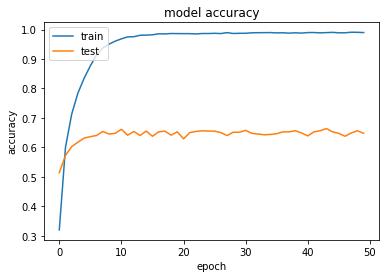

In [84]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

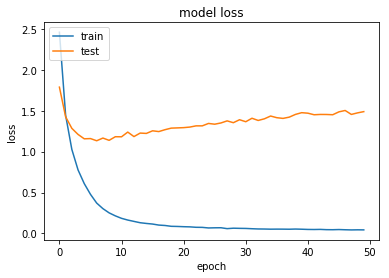

In [85]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('\nTest categorical_crossentropy:', score[0])
print('Categorical accuracy:', score[1])
print('Accuracy:', score[2])

2000/2000 [==============================] - 2s 832us/step

Test categorical_crossentropy: 1.5342233161926269
Categorical accuracy: 0.6565
Accuracy: 0.6565
